In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def Load_index_data(self,filename_n):
        with open(filename_n1,'r') as f_n1:
            data = f_n1.readlines()
            for line in data:
                line = line.replace('\n','')
                wavl = int(line.split(' ')[0].strip())
                n_re = float(line.split(' ')[1].strip())
                n_im = float(line.split(' ')[2].strip())
                #n1_dict.append(complex(n_re,n_im))
                n1_dict[wavl] = n_re
        with open(filename_n0,'r') as f_n0:
            data = f_n0.readlines()
            for line in data:
                wavl = int(line.split()[0])
                n_re = float(line.split()[1])
                n_im = float(line.split()[2])
                #n0_dict.append(complex(n_re,n_im))
                n0_dict[wavl] = n_re
        return n1_dict, n0_dict

In [17]:
def Write_index_data(self,filename_n):
        n1_dict = {}
        with open(filename_n1,'r') as f_n1:
            data = f_n1.readlines()
            for line in data:
                line = line.replace('\n','')
                wavl = int(line.split(' ')[0].strip())
                n_re = float(line.split(' ')[1].strip())
                n_im = float(line.split(' ')[2].strip())
                #n1_dict.append(complex(n_re,n_im))
                n1_dict[wavl] = n_re
        with open(filename_n0,'r') as f_n0:
            data = f_n0.readlines()
            for line in data:
                wavl = int(line.split()[0])
                n_re = float(line.split()[1])
                n_im = float(line.split()[2])
                #n0_dict.append(complex(n_re,n_im))
                n0_dict[wavl] = n_re
        return n1_dict, n0_dict

In [18]:
def Plot_curve(data_arr,Y_legends,
                X_label,Y_label,
                title,
                marker_list,linestyle_list,
                colors_list=['green','mediumblue','tomato','orange','deepskyblue','lightskyblue','black','red']*2,
                bbox_to_anchor=(),
                text="",
                dpi=400):
    #Plot parameters
    figsize = (8,6)
    fonttype = "Helvetica"
    fontsize = 9
    grid_linewidth = 0.8
    plot_linewidth = 1.5

    plt.figure(figsize=figsize)
    idx = 0
    for data_idx in range(len(data_arr)):
        X       = data_arr[data_idx][:,0]           #X is a 2D array
        Y_arr   = data_arr[data_idx][:,1:]          #Y_arr is a 2D array
        for Y_idx in range(np.shape(Y_arr)[1]):
            plt.plot(X,Y_arr[:,Y_idx],label=Y_legends[idx],
                        color=colors_list[idx], marker=marker_list[idx],
                        linestyle=linestyle_list[idx], linewidth=plot_linewidth)
            idx = idx + 1


    plt.rcParams["font.family"] = fonttype
    plt.rcParams.update({'font.size': fontsize})
    plt.yticks(fontproperties = fonttype, size = fontsize)
    plt.xticks(fontproperties = fonttype, size = fontsize)
    plt.ylabel(Y_label, fontdict={'family' : fonttype, 'size' : fontsize})
    plt.xlabel(X_label, fontdict={'family' : fonttype, 'size' : fontsize})
    plt.title(title)
    if len(bbox_to_anchor)>0:
        plt.legend(bbox_to_anchor=bbox_to_anchor, loc='lower left', borderaxespad=0)
    else:
        plt.legend(loc='best')
    if not text == "":
        plt.text(np.quantile(X,0.75),np.quantile(Y_arr,0.05),
                text, bbox=dict(boxstyle="round,pad=0.9", fc="white", alpha=0.9))
    plt.grid(linewidth=grid_linewidth, alpha=0.3)
    savename = "results/"+str(title)+".jpg"
    plt.savefig(savename,dpi=dpi)
    plt.tight_layout()
    plt.show()


In [19]:
def str2complex(s):
        str = s.replace(" ","")\
                .replace("(","")\
                .replace(")","")\
                .replace("i","j")
        return complex(str)


Plot the material dispersion of refractive index 

In [20]:
filename_SiN_Luke = "Si3N4_index_Luke.txt"
filename_SiN_Phi  = "Si3N4_index_Philips.txt"
filename_SiO2     = "SiO2_index.txt"

In [21]:
index_SiN_Luke_arr = []
with open(filename_SiN_Luke,'r') as f:
    data_uncoupled = f.readlines()
    for line in data_uncoupled:
        wavl  = int(line.split()[0])
        index = float(line.split()[1])
        index_SiN_Luke_arr.append([wavl,index])
index_SiN_Luke_arr  = np.array(index_SiN_Luke_arr)
index_SiN_Luke_arr[:5]

array([[1500.        ,    1.99767482],
       [1501.        ,    1.99764749],
       [1502.        ,    1.99762019],
       [1503.        ,    1.99759293],
       [1504.        ,    1.99756571]])

In [22]:
index_SiN_Philips_arr = []
with open(filename_SiN_Phi,'r') as f:
    data_uncoupled = f.readlines()
    for line in data_uncoupled:
        wavl  = int(line.split()[0])
        index = float(line.split()[1])
        index_SiN_Philips_arr.append([wavl,index])
index_SiN_Philips_arr  = np.array(index_SiN_Philips_arr)
index_SiN_Philips_arr[:5]

array([[1500.        ,    1.97938729],
       [1501.        ,    1.97937676],
       [1502.        ,    1.97936625],
       [1503.        ,    1.97935576],
       [1504.        ,    1.97934527]])

In [23]:
# wavl_vec = index_SiN_Philips_arr[:,0]
# Y_data = np.c_[index_SiN_Philips_arr[:,1:],index_SiN_Luke_arr[:,1:]]
# Plot_curve(wavl_vec,Y_data,
#             Y_legends=['Si3N4(Philips)','Si3N4(Luke)'],
#             X_label='wavelength(nm)',Y_label='refractive index',
#             title = "Refractive index of Si3N4 of different models ",
#             marker_list=[".","."],
#             linestyle_list=["-","-","-","-","--","--"])

In [30]:
wavl_nm = np.linspace(1000,2000,1001).astype(int)
wavl_um  = wavl_nm / 1000
n=(1+3.0249/(1-(0.1353406/wavl_um)**2)+40314/(1-(1239.842/wavl_um)**2))**.5
dict(zip(wavl_nm,n))

{np.int64(1000): np.float64(2.013731780575764),
 np.int64(1001): np.float64(2.0136902430164474),
 np.int64(1002): np.float64(2.013648779003336),
 np.int64(1003): np.float64(2.013607388181722),
 np.int64(1004): np.float64(2.0135660701987126),
 np.int64(1005): np.float64(2.0135248247032242),
 np.int64(1006): np.float64(2.0134836513459655),
 np.int64(1007): np.float64(2.0134425497794277),
 np.int64(1008): np.float64(2.0134015196578776),
 np.int64(1009): np.float64(2.013360560637341),
 np.int64(1010): np.float64(2.013319672375595),
 np.int64(1011): np.float64(2.0132788545321576),
 np.int64(1012): np.float64(2.013238106768275),
 np.int64(1013): np.float64(2.013197428746913),
 np.int64(1014): np.float64(2.0131568201327457),
 np.int64(1015): np.float64(2.0131162805921443),
 np.int64(1016): np.float64(2.013075809793168),
 np.int64(1017): np.float64(2.0130354074055536),
 np.int64(1018): np.float64(2.012995073100704),
 np.int64(1019): np.float64(2.012954806551678),
 np.int64(1020): np.float64(2.

In [33]:
A= np.linspace(3,5,3)
B= np.linspace(1,3,3)
A,B = np.meshgrid(A,B)
np.column_stack((A.ravel(), B.ravel()))

array([[3., 1.],
       [4., 1.],
       [5., 1.],
       [3., 2.],
       [4., 2.],
       [5., 2.],
       [3., 3.],
       [4., 3.],
       [5., 3.]])

In [36]:
start_gap_x   = 0
end_gap_x     = 0
num_of_gaps_x = 1
gap_arr_x = np.linspace(start_gap_x,end_gap_x,num_of_gaps_x)

start_gap_y   = 5
end_gap_y     = 5
num_of_gaps_y = 1
gap_arr_y = np.linspace(start_gap_y,end_gap_y,num_of_gaps_y)

A,B = np.meshgrid(gap_arr_x,gap_arr_y)
gap_arr = np.column_stack((A.ravel(), B.ravel()))
gap_arr

array([[0., 5.]])

/var/folders/ch/7r5m10cd1x18pgpw08_ksg300000gn/T/ipykernel_85884/2947661456.py:2: RuntimeWarning: divide by zero encountered in divide
  n=(1+3.0249/(1-(0.1353406/x)**2)+40314/(1-(1239.842/x)**2))**.5
/var/folders/ch/7r5m10cd1x18pgpw08_ksg300000gn/T/ipykernel_85884/2947661456.py:2: RuntimeWarning: invalid value encountered in sqrt
  n=(1+3.0249/(1-(0.1353406/x)**2)+40314/(1-(1239.842/x)**2))**.5


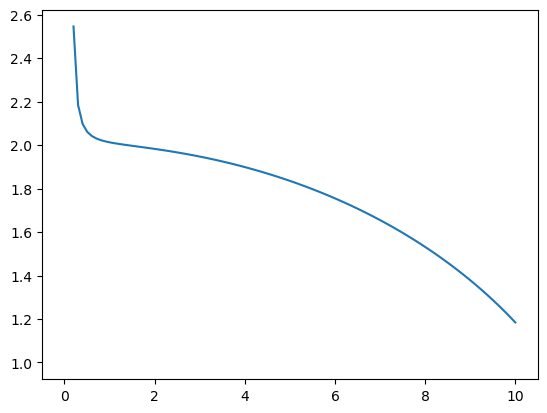

In [25]:
x = np.linspace(0,10,100)
n=(1+3.0249/(1-(0.1353406/x)**2)+40314/(1-(1239.842/x)**2))**.5
plt.plot(x,n)